# Детекция шахматной доски и позиций на сканах книг


Проблема:

Есть большое число шахматных журналов и книг содержащий описания шахматные партии и задачи. Хотелось автоматизировать вместе с оцифровкой книг распознавание партий. Также при наличии быстрого детектора можно сделать распознавание интерактивным – прямо во время чтения книги с телефона

Вариант решения:

1. Для каждой страницы найти с помощью детектора расположения досок. 
    Вариант решения а) Искать прямоугольники с помощью встроенного в iOS/macOS метода с помощью Vision фреймворка, выбрав нужные прямоугольники классификатором 
        см ноутбук `chssnet_train_rect_classifier.ipynb` – рабоет довольно быстро, но пропускает некоторые образцы
    Вариант б) Сразу искать нейросетевый детектором области с досками.
        см ноутбук `chssnet_train_rect_detector.ipynb` – обученнную модель по итогу не получилось сконвертировать в CoreML, нужно брать за основу другую 
2. Для каждой доски отдельным детектором получать расположения всех фигур – не реализовано


Примеры страниц содержащих иллюстрации шахматных партий

<img src="imgs/d0b5d56f-page_264_0.png" width="20%"/>
<img src="imgs/35af185c-page_17_0.png" width="20%"/>
<img src="imgs/03b6dc41-page_52_0.png" width="20%"/>
<img src="imgs/2cf22b08-page_52_0.png" width="20%"/>
<img src="imgs/0edfd50c-page_40_0.png" width="20%"/>

# 1. Подготовка датасета к разметке

В качестве исходных данных взят архив сканов шахматных журналов и книг. Для облегчения работы по разметке и обучению сконвертируем pdf/djvu документы в наборы страниц в разрешении 300dpi и приведем страницы к одному размеру. Горизонтальные страницы разрежем на 2 вертикальных половины. Пустое пространство зальем белым. Код конвертера в скрипте `pdf_extractor.py`

In [17]:
# pdf_extractor.py ../books_dataset/large/test/

# 2. Разметка

Используя Label Studio были размечены руками 184 страницы из разных источников – выбраны книги разных годов и на разных языках. Результат разметки экспортирован в формате COCO

<img src="./imgs/label_studio.png" alt="drawing" width="50%"/>

# 3. Результаты детекции первым способом

Код приложения см в папке ios. Более подробный отчет см в `chssnet_train_rect_classifier.ipynb`

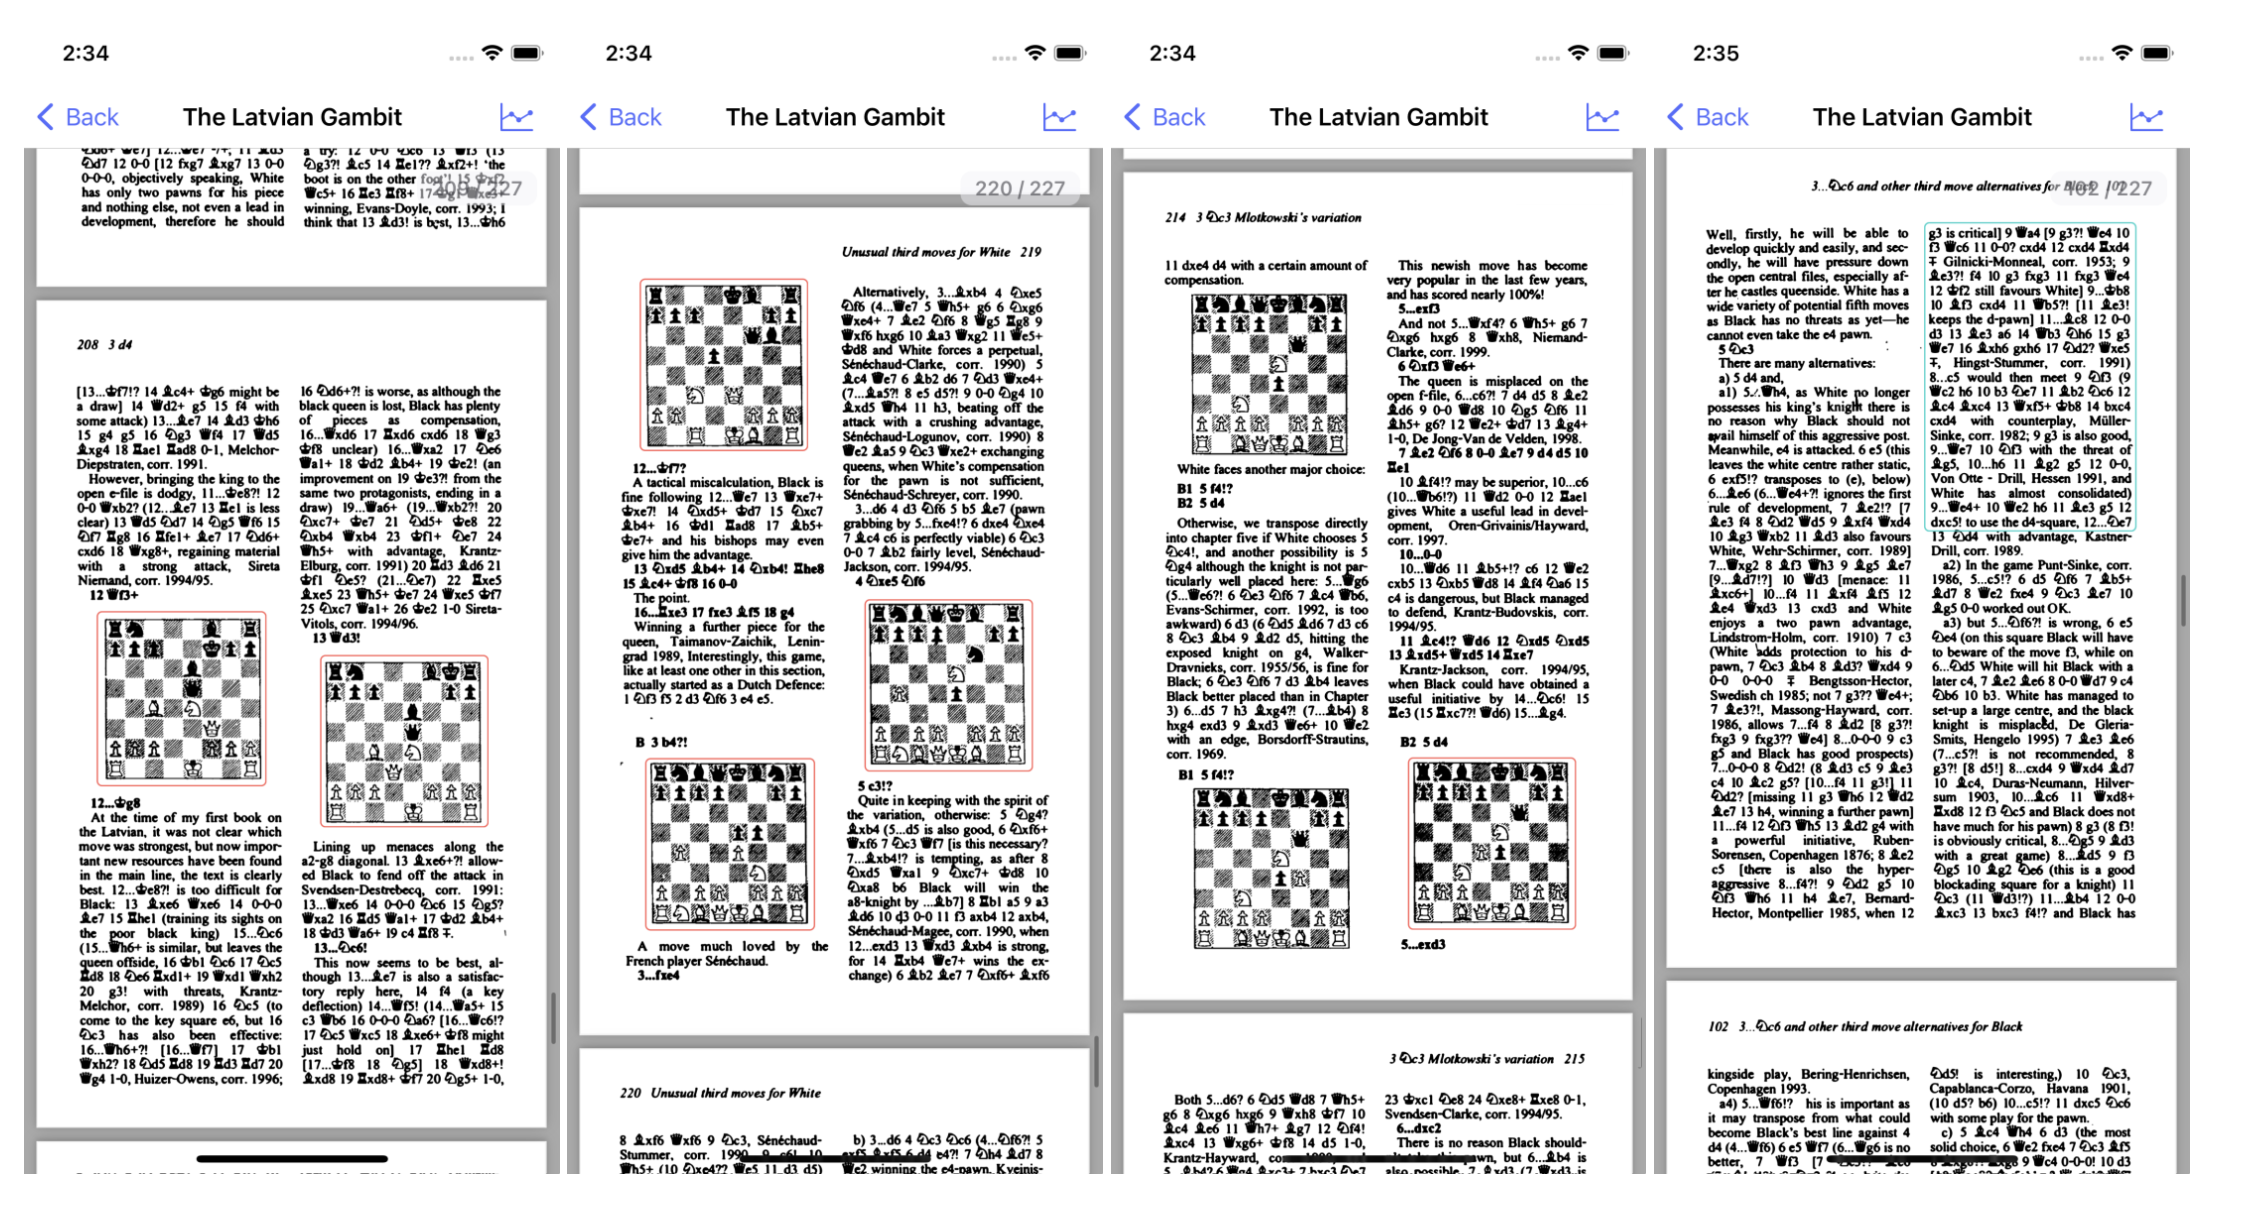


<video width='25%'
  controls
  src="ios/Screen Recording - iPhone 12 mini - 16.4 - 2024-02-05 at 05.45.00.mp4">
  Sorry, your browser doesn't support embedded videos, but don't worry, you can
  and watch it with your favorite video player!
</video>

# 4. Результаты детекции вторым способом

В этом варианте получилось только дообучить модель FasterRCNN+MobileNetV3 на своем датаcете в pytorch, но не получилось сконвертировать её в CoreML чтобы протестировать на девайсе

Детальнее см `chssnet_train_rect_detector.ipynb`